In [ ]:
import keras
import numpy as np
import cv2
import argparse
from imutils import paths
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/AugmentedDataset'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=(180, 180),
    batch_size=30,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dataset, # same directory as training data
    target_size=(180, 180),
    batch_size=30,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1400 images belonging to 5 classes.
Found 346 images belonging to 5 classes.


In [ ]:
image_size = 180
IMG_SHAPE = (image_size, image_size, 3)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(5, activation='sigmoid')])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
steps_per_epoch = 30
validation_steps = 30

history = model.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/10
30/30 [==============================] - 292s 9s/step - loss: 1.6074 - accuracy: 0.3489 - val_loss: 1.2121 - val_accuracy: 0.5550
Epoch 2/10
30/30 [==============================] - 238s 8s/step - loss: 1.1898 - accuracy: 0.5211 - val_loss: 1.0153 - val_accuracy: 0.6376
Epoch 3/10
30/30 [==============================] - 242s 8s/step - loss: 0.9999 - accuracy: 0.6281 - val_loss: 0.8671 - val_accuracy: 0.7041
Epoch 4/10
30/30 [==============================] - 240s 8s/step - loss: 0.8107 - accuracy: 0.7256 - val_loss: 0.6995 - val_accuracy: 0.7787
Epoch 5/10
30/30 [==============================] - 237s 8s/step - loss: 0.7148 - accuracy: 0.7573 - val_loss: 0.6219 - val_accuracy: 0.8039
Epoch 6/10
30/30 [==============================] - 246s 8s/step - loss: 0.5974 - accuracy: 0.8156 - val_loss: 0.5363 - val_accuracy: 0.8326
Epoch 7/10
30/30 [==============================] - 239s 8s/step - loss: 0.5038 - accuracy: 0.8456 - val_loss: 0.4680 - val_accuracy: 0.8693
Epoch 8/10
30

In [ ]:
model.evaluate(validation_generator)

12/12 [==============================] - 42s 3s/step - loss: 0.3161 - accuracy: 0.9335


[0.3160884976387024, 0.9335260391235352]

In [ ]:
mobilenetmodel = model.save('/content/drive/MyDrive/my_mobilenet_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

1/1 [==============================] - 0s 58ms/step


Text(0.5, 1.0, 'Sharks')

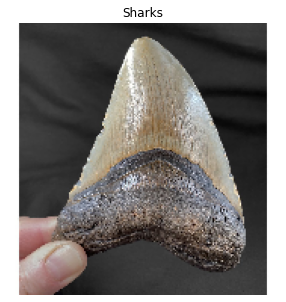

In [ ]:
img_path = '/content/drive/MyDrive/sh.jpg'
img = image.load_img(img_path, target_size=(180, 180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ['Sharks', 'Elephants','Hyrax', 'Masrasector', 'Afradapis']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title((class_labels[pred[0]]))